## Automated EDA (Exploratory Data Analysis)

**Description:** 📊🔍Data analysis is an essential aspect of any data-driven project, but the manual process of preprocessing and visualizing data can be time-consuming and error-prone. Our capstone project tackles this challenge head-on by introducing an Automated EDA Toolkit. This toolkit streamlines the EDA process, making it quicker, more efficient, and hassle-free.

**Key Features:**

1. **Flexible Data Format Support:** Whether your data is in CSV, Excel, or resides in SQL databases, the toolkit can seamlessly handle different data formats, giving you the freedom to work with your preferred data source.

2. **Automated Preprocessing:** The toolkit intelligently detects the data types of each column and applies relevant preprocessing steps. It handles missing values, encodes categorical features, scales numerical ones, and more, eliminating the need for manual intervention.

3. **Feature Selection and Dimensionality Reduction:** Dealing with large datasets? The toolkit offers built-in options for feature selection and dimensionality reduction, helping you focus on the most relevant aspects of your data.

4. **Comprehensive Visualization Dashboard:** Once your data is preprocessed, the toolkit generates an all-inclusive visualization dashboard tailored to each column type. Explore histograms, box plots, scatter plots, and more, all crafted using Python's Matplotlib, Seaborn, and Plotly libraries.

5. **Interactive Exploration:** The visualization dashboard isn't just static; it's interactive. Customize your visualizations, zoom in on specific data points, and gain deeper insights into your dataset.

**How It Works:**
1. **Input Data:** Provide your data in CSV, Excel, or SQL format.
2. **Automated Preprocessing:** The toolkit identifies column types and applies preprocessing steps accordingly.
3. **Feature Selection (Optional):** If needed, you can choose to perform feature selection or dimensionality reduction.
4. **Visualization Dashboard:** Enjoy a stunning dashboard featuring various visualizations for each column type.
5. **Interact and Explore:** Dive into the visualizations, customize them, and gain insights like never before.

**Why It Matters:**
Our Automated EDA Toolkit not only saves you valuable time but also enhances the quality of your data analysis. By automating the mundane tasks, you can focus on the real analytical challenges and extract meaningful insights from your data.

If you're ready to automate your EDA process, preprocess data, and create insightful visualizations without breaking a sweat, this project is your gateway to an efficient and insightful data analysis journey! 📈📋

Please enter the path of the file: International_Report_Passengers.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680985 entries, 0 to 680984
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   data_dte      680985 non-null  object
 1   Year          680985 non-null  int64 
 2   Month         680985 non-null  int64 
 3   usg_apt_id    680985 non-null  int64 
 4   usg_apt       680985 non-null  object
 5   usg_wac       680985 non-null  int64 
 6   fg_apt_id     680985 non-null  int64 
 7   fg_apt        680985 non-null  object
 8   fg_wac        680985 non-null  int64 
 9   airlineid     680985 non-null  int64 
 10  carrier       678188 non-null  object
 11  carriergroup  680985 non-null  int64 
 12  type          680985 non-null  object
 13  Scheduled     680985 non-null  int64 
 14  Charter       680985 non-null  int64 
 15  Total         680985 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 8

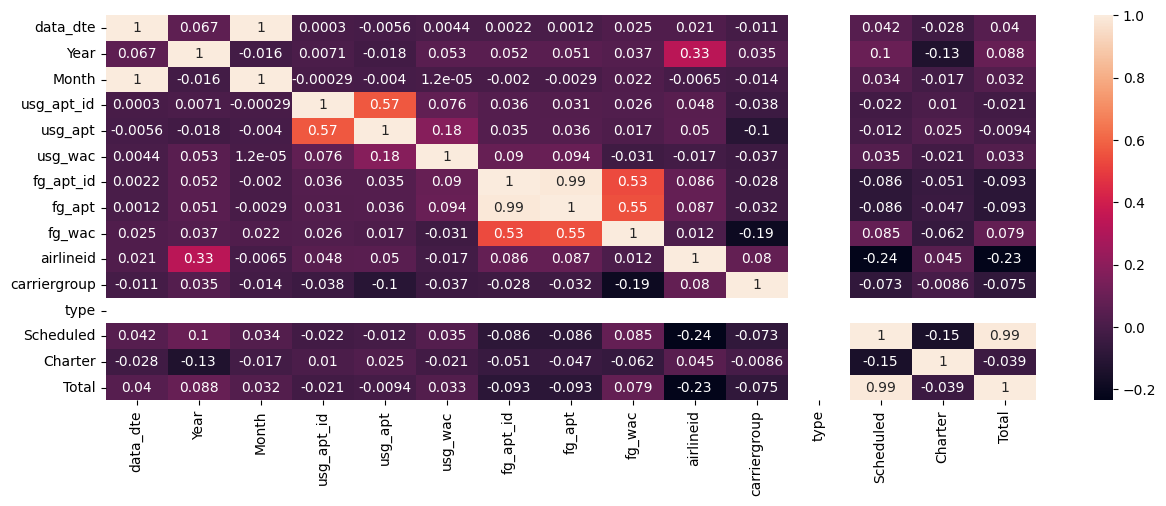

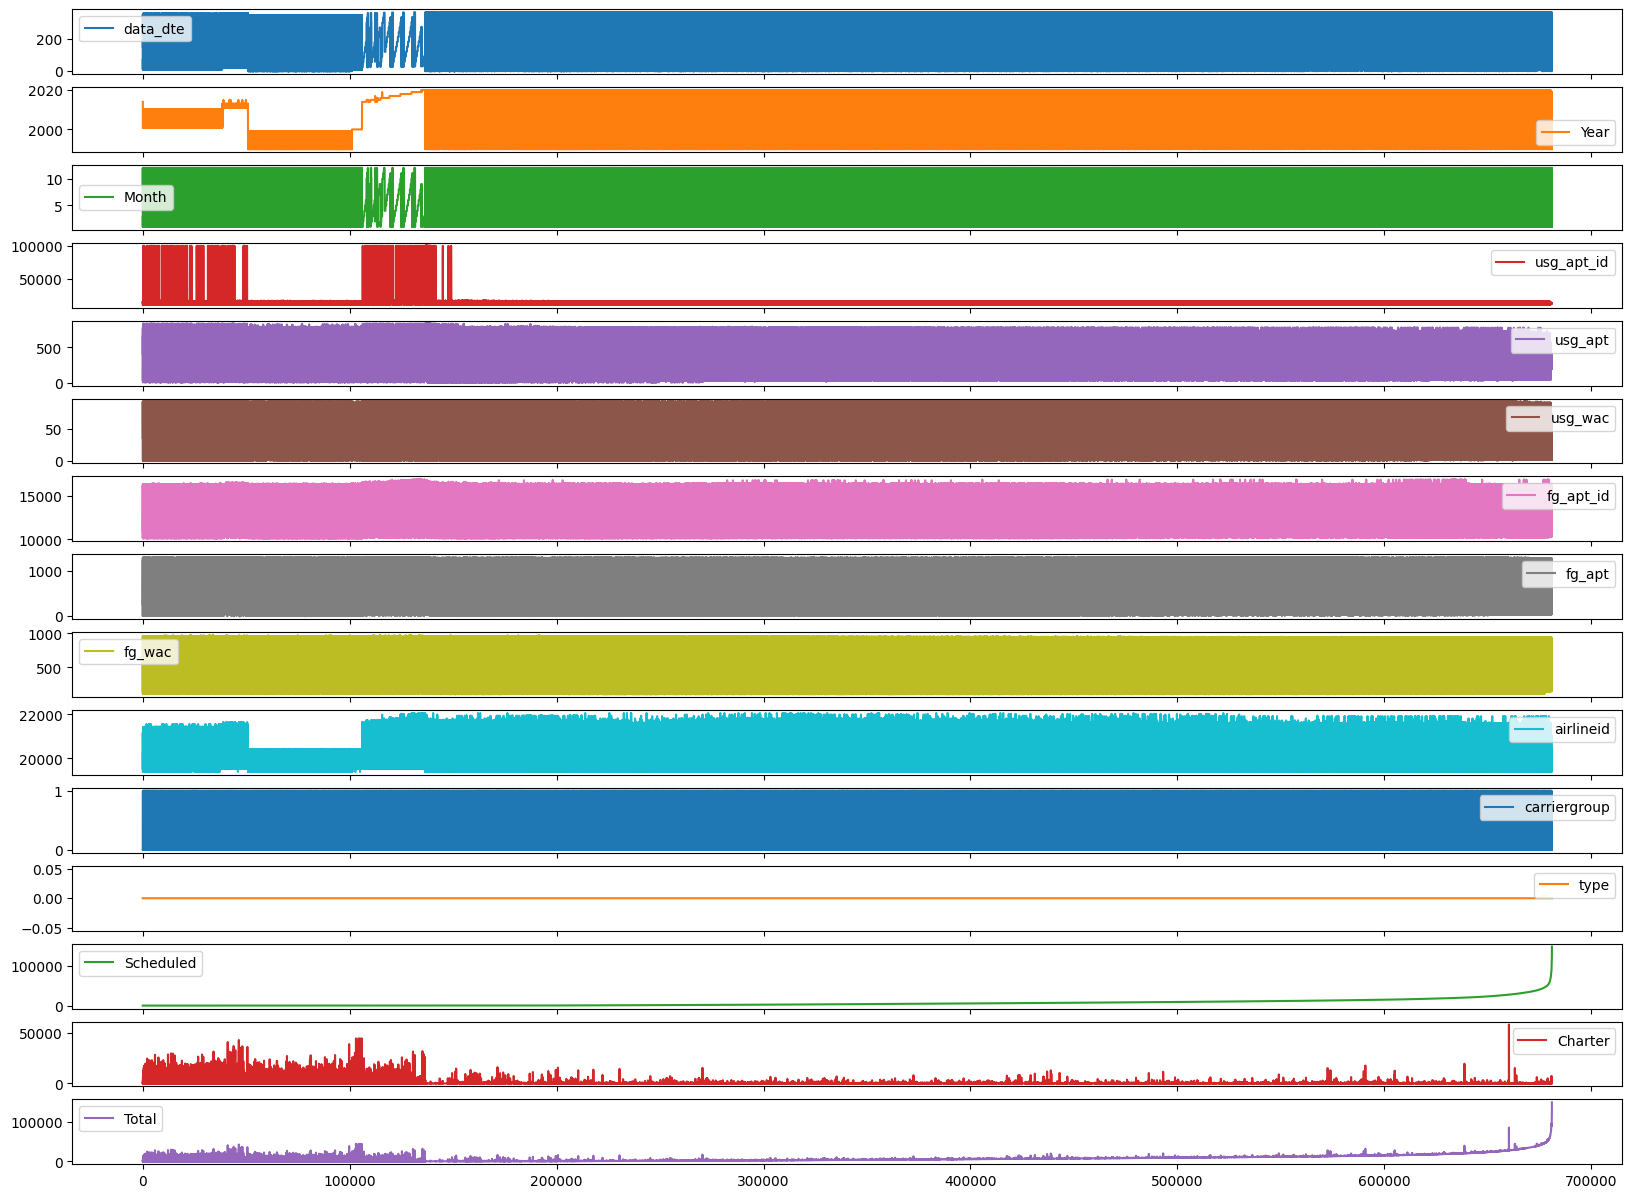

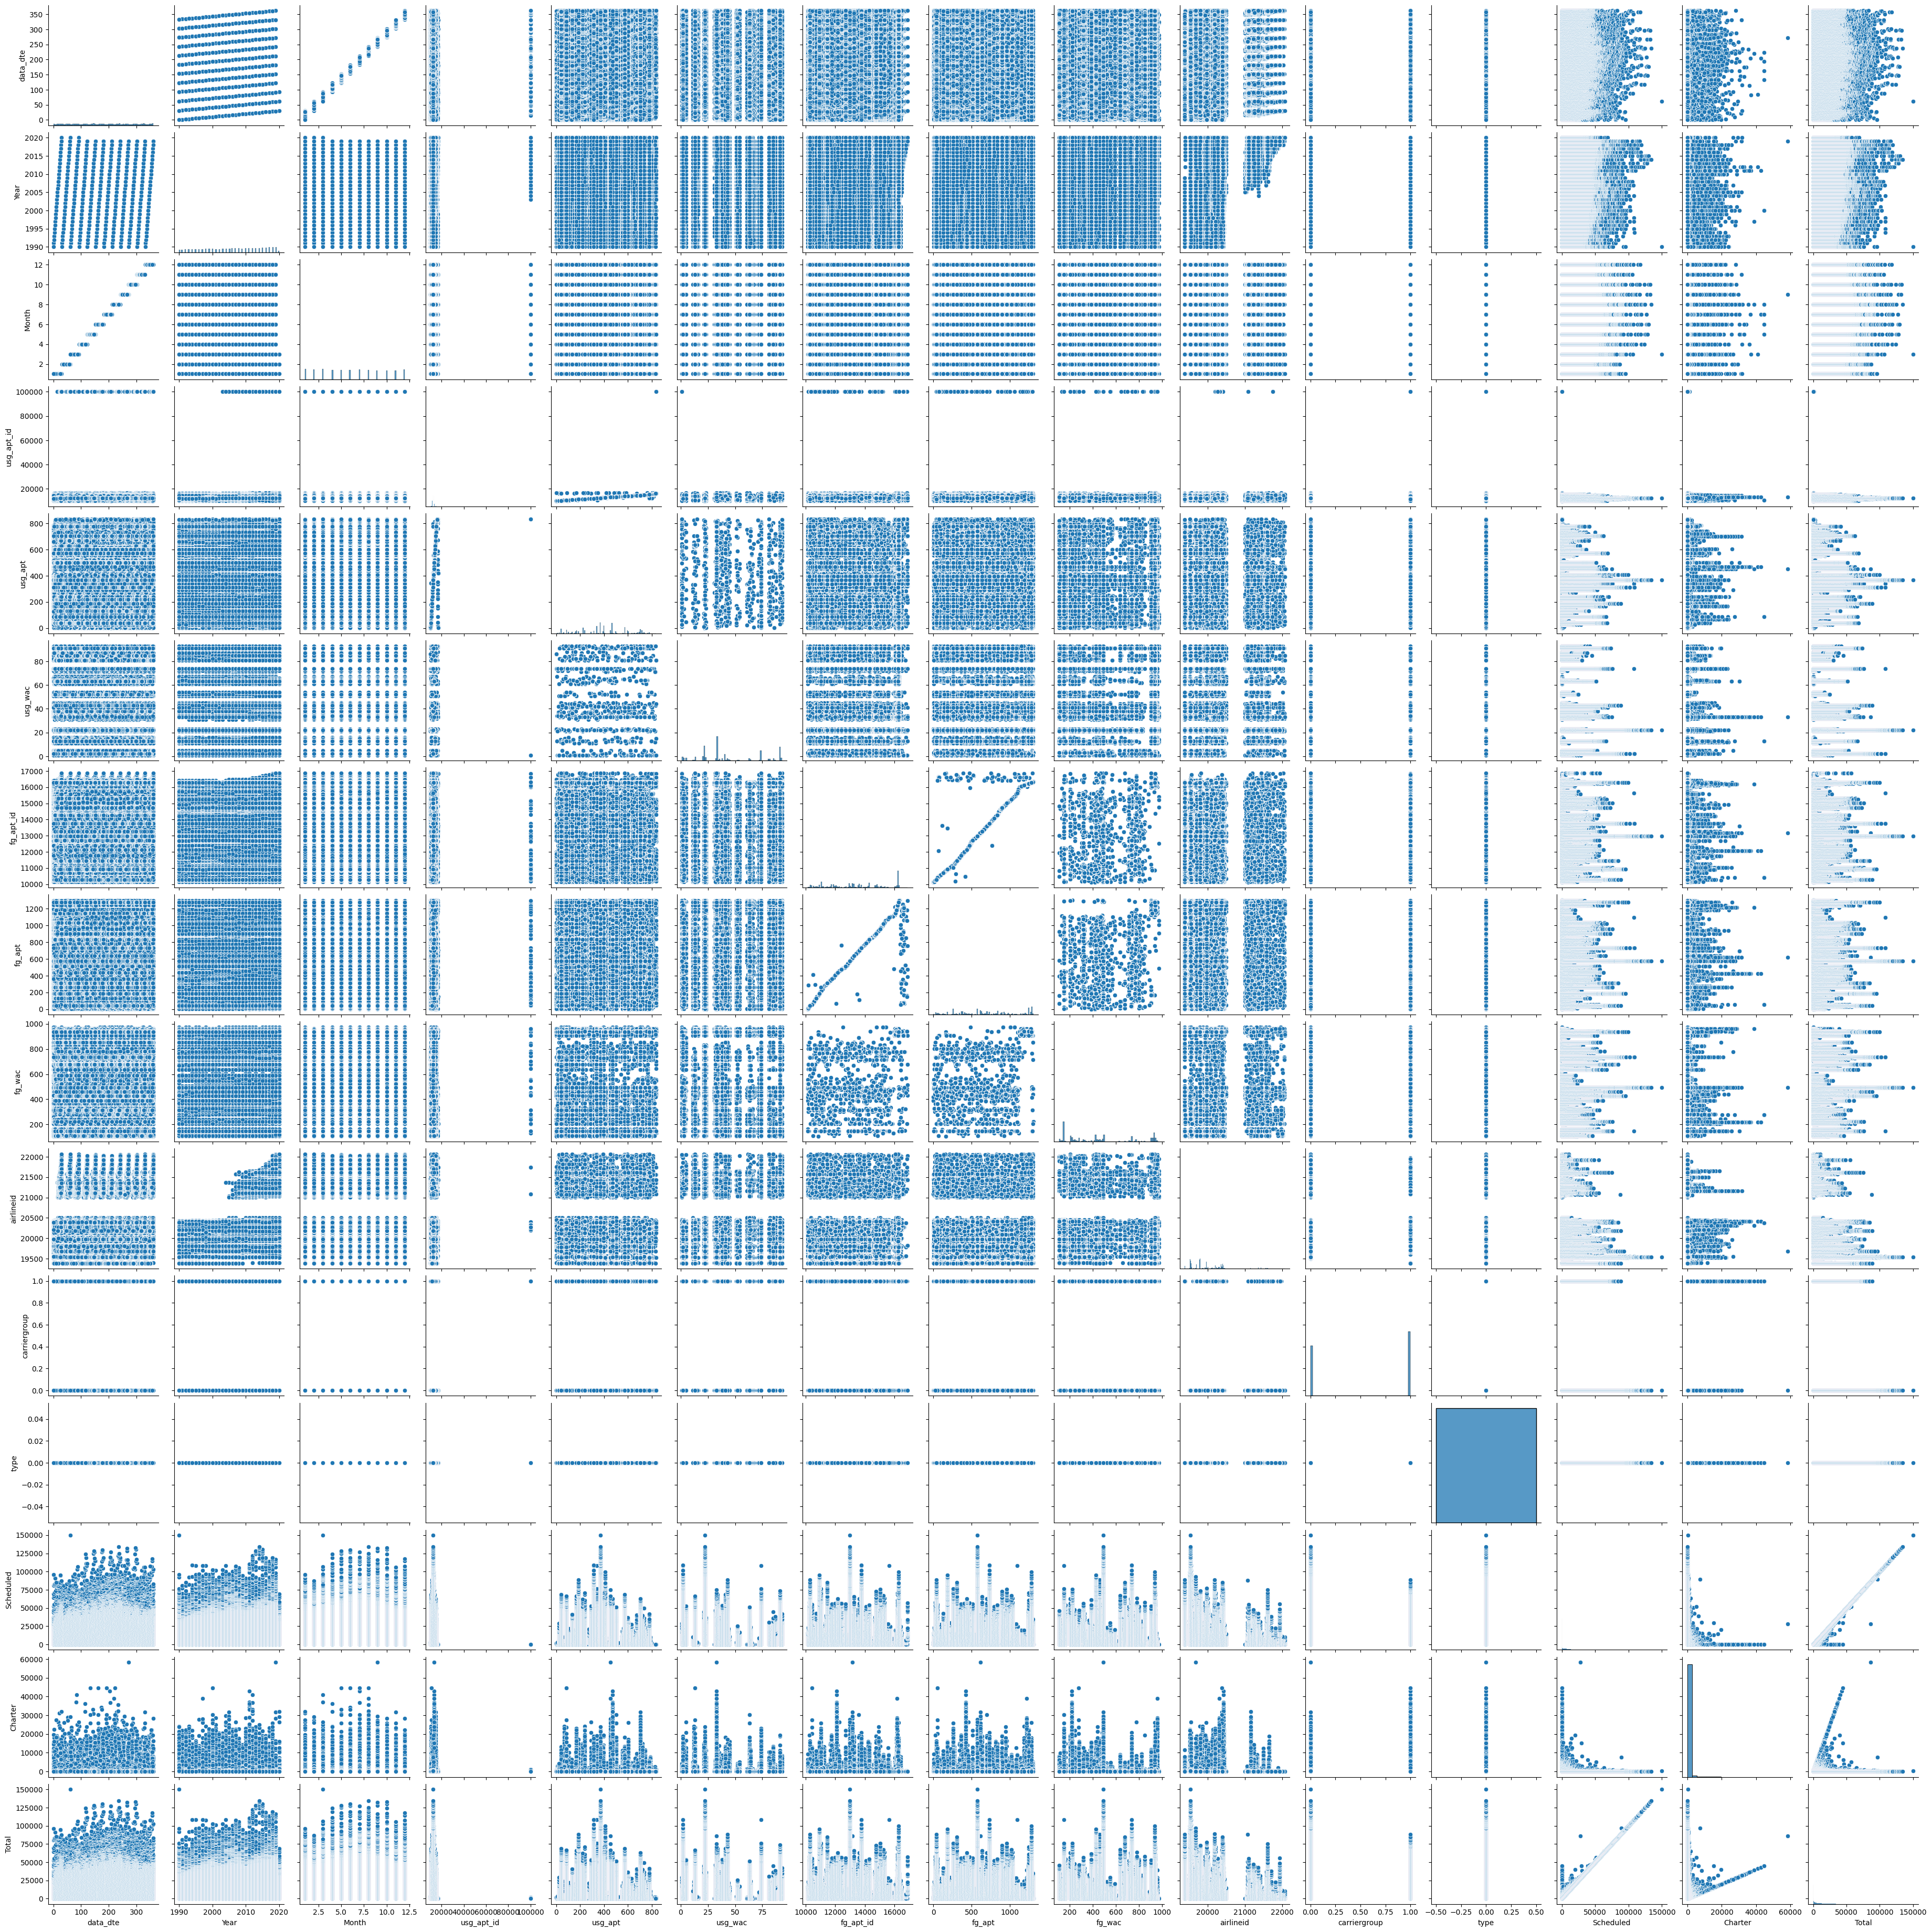

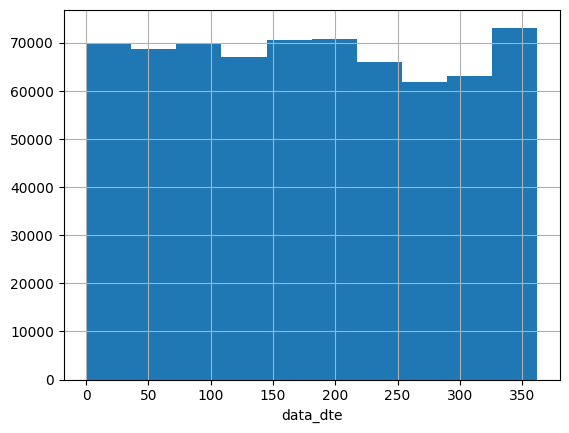

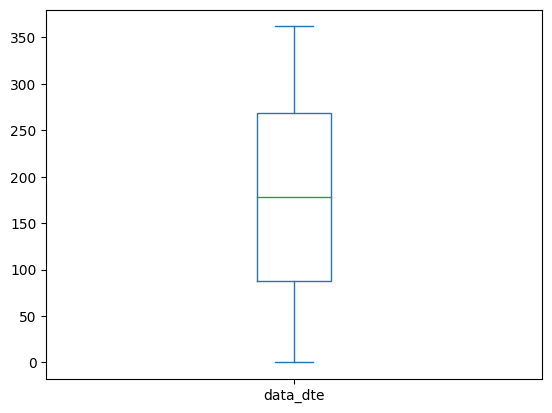

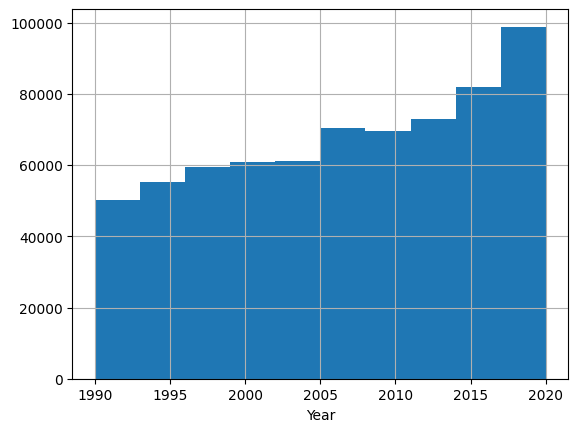

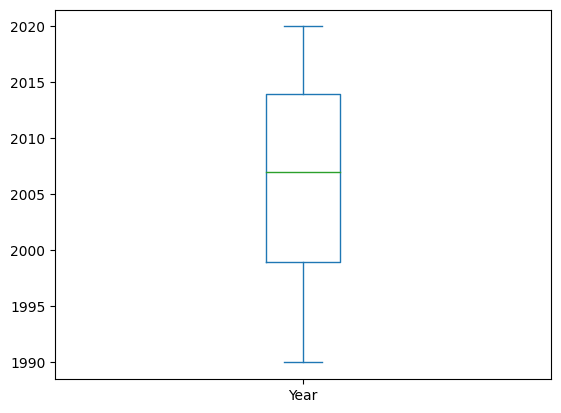

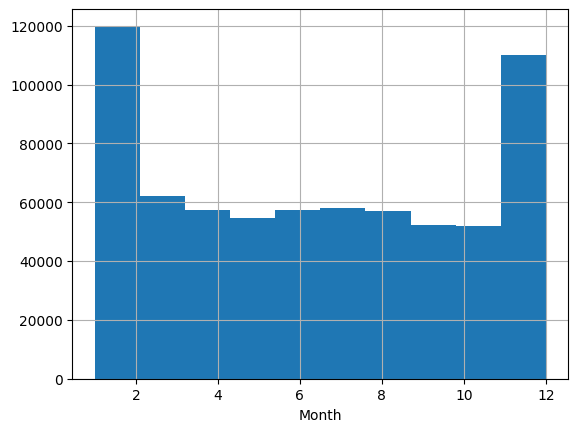

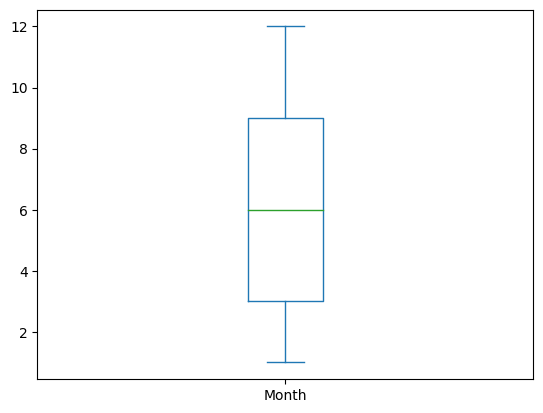

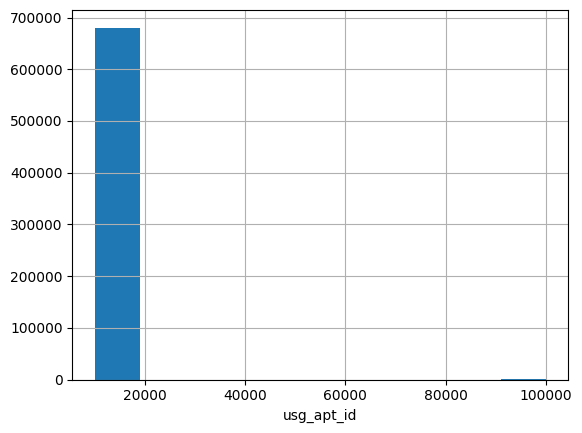

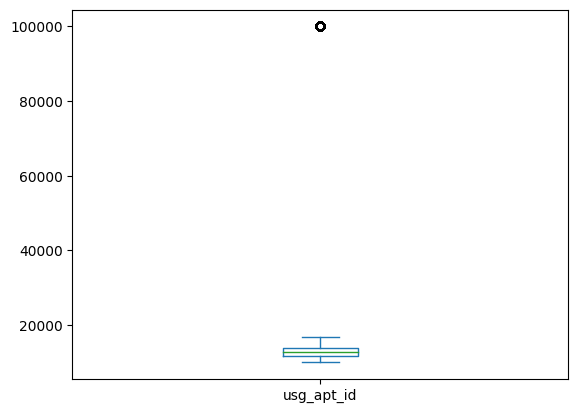

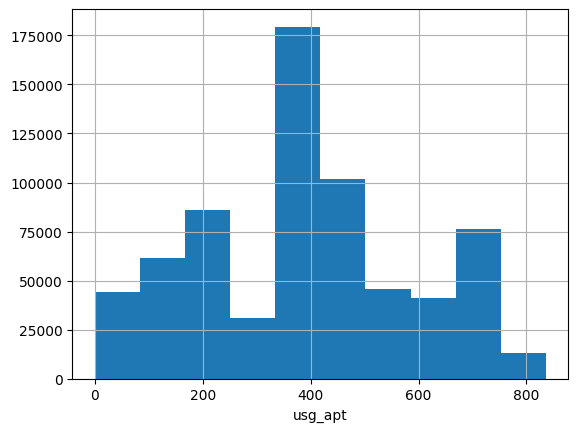

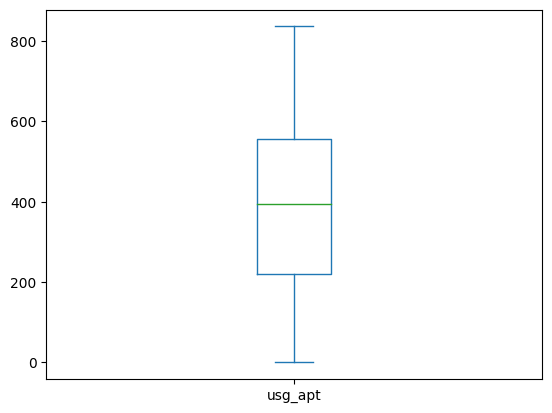

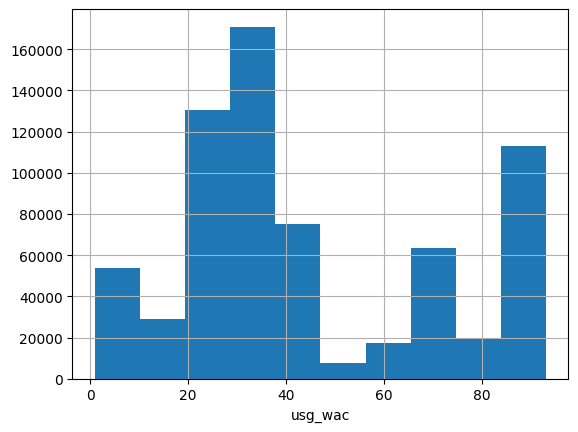

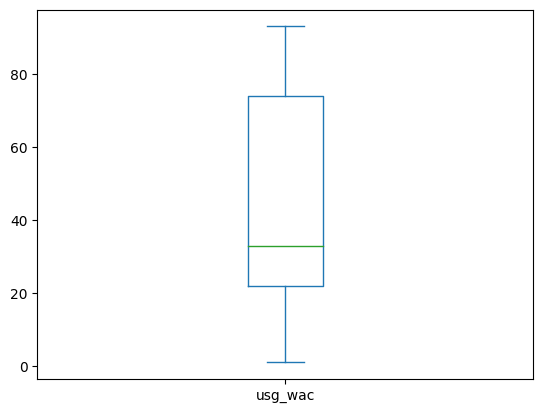

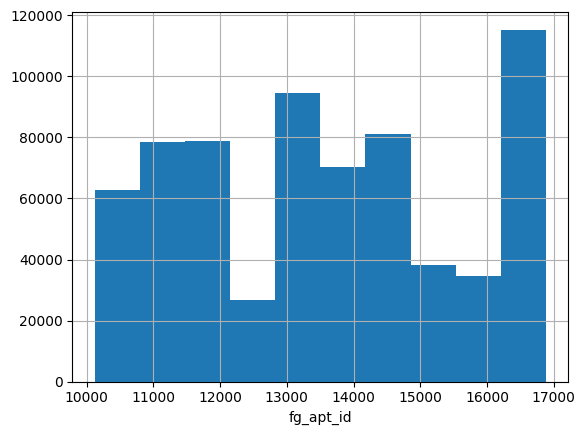

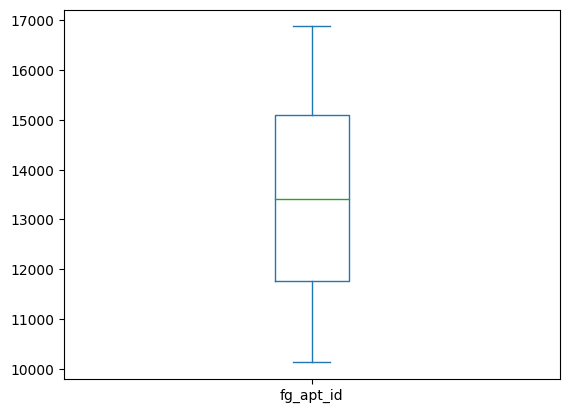

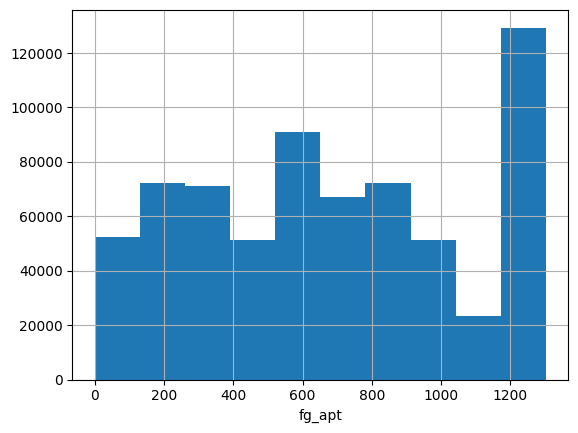

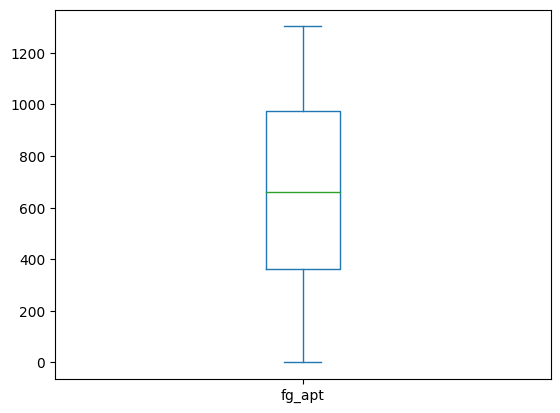

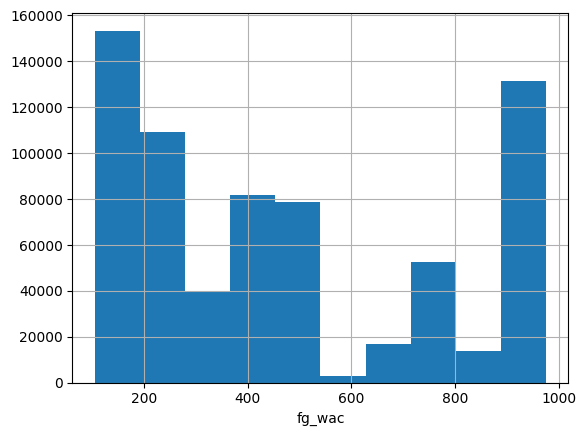

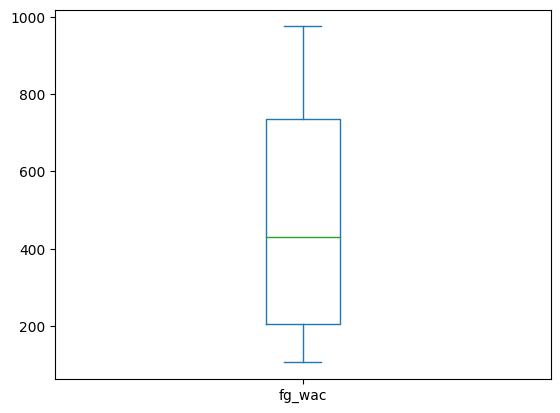

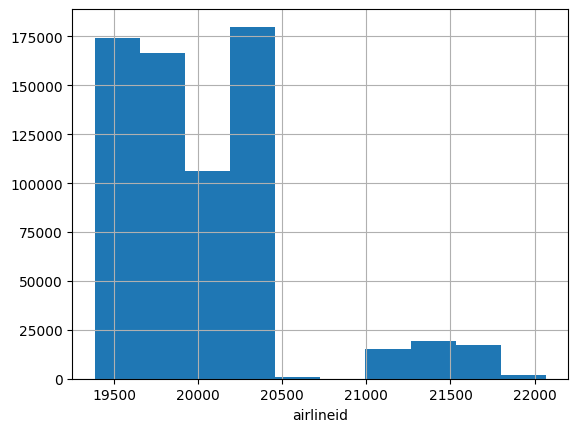

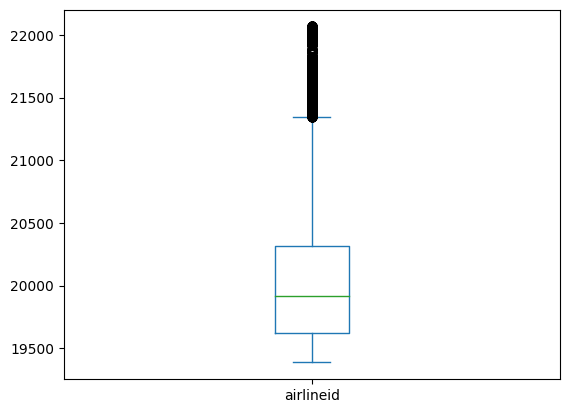

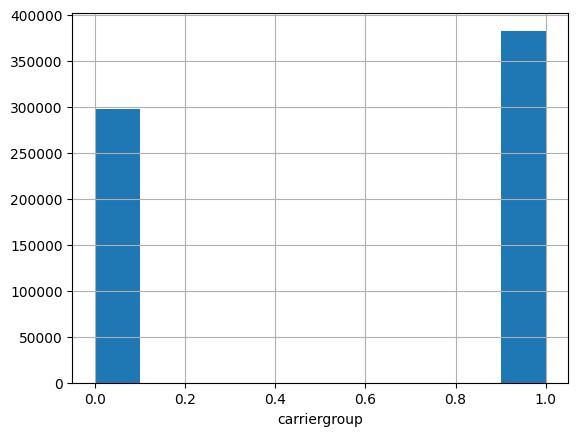

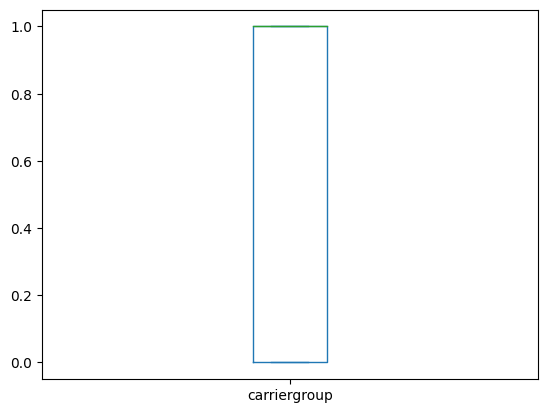

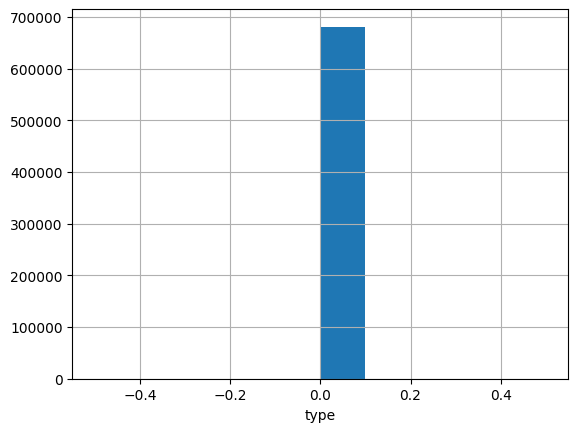

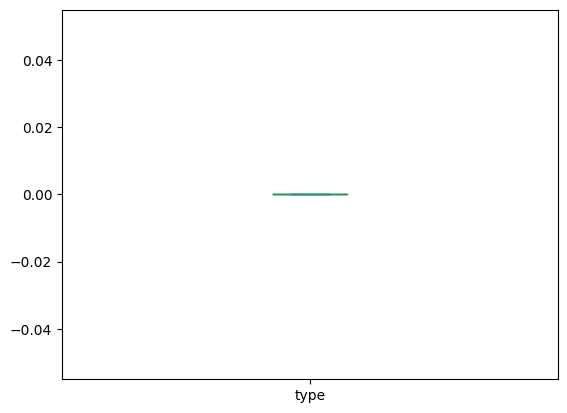

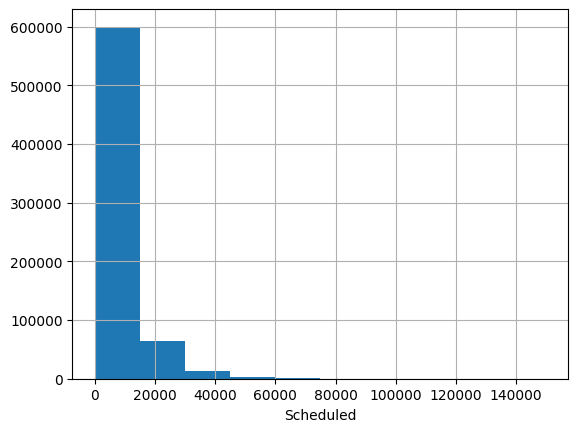

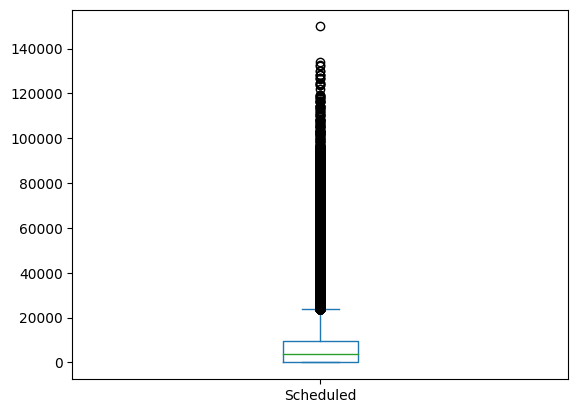

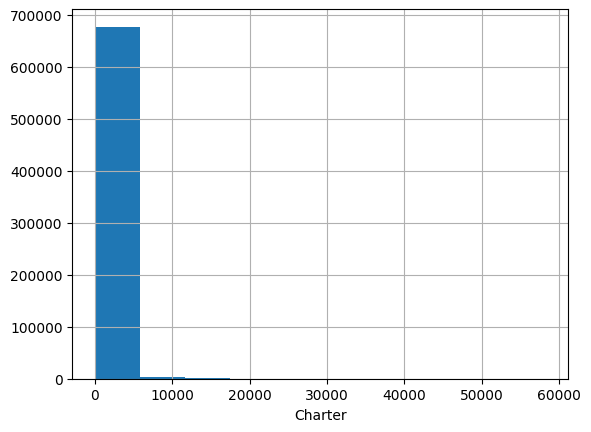

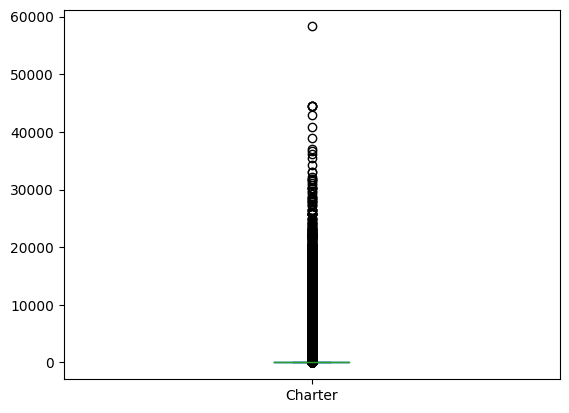

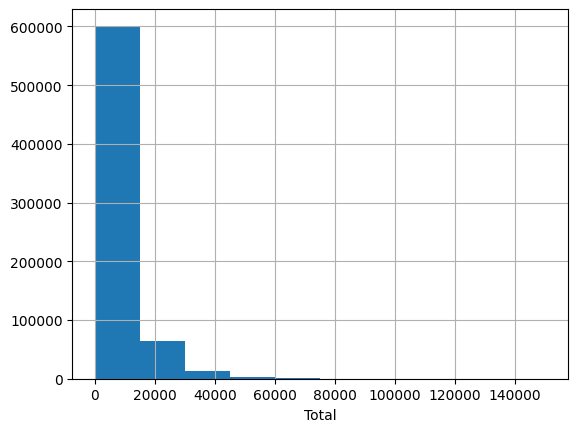

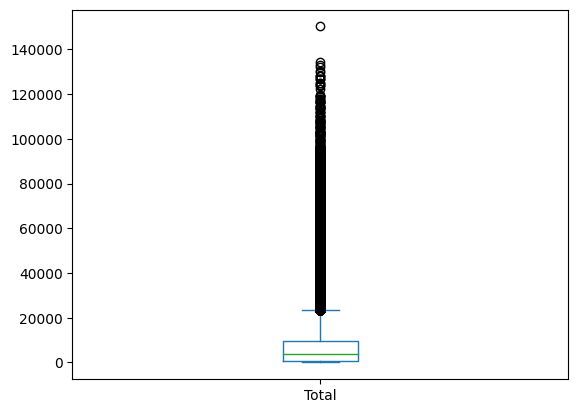

In [1]:
def EDA():
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import LabelEncoder
    import warnings
    warnings.filterwarnings("ignore")
    %matplotlib inline

    def load_data(file_path):
        if file_path.endswith('.csv'):
            return pd.read_csv(file_path)
        elif file_path.endswith('.xlsx'):
            return pd.read_excel(file_path)
        elif file_path.endswith('.sql'):
            # Add code to read data from SQL file using your preferred method
            # For example, you can use libraries like SQLAlchemy or pandas' read_sql
            # return pd.read_sql(query, connection)
            pass
        else:
            raise ValueError("Unsupported file format")

    # Load data
    file_name = input('Please enter the path of the file: ')
    dataset = load_data(file_name)

    print(dataset.info())
    print(dataset.describe())
    print()

    print('#---------------------------------------------------------------')
    print('Check for Missing Values or NaN Values in the Dataset')
    print('#---------------------------------------------------------------')

    # Method - 1
    print('\nCount Number of Missing Values on Each Column:')
    print(dataset.isnull().sum(axis=0))

    # Method - 2
    feature_count = dataset.columns[dataset.isnull().sum() != 0].size
    print("\nTotal Features with Missing Values: " + str(feature_count))

    # Method - 3
    dataset = dataset.drop(dataset.columns[dataset.isnull().sum() != 0], axis=1, inplace=False)
    print(dataset)

    columnsToEncode = list(dataset.select_dtypes(include=['category', 'object', 'bool']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            dataset[feature] = le.fit_transform(dataset[feature])
        except:
            print('Error encoding ' + feature)

    plt.figure(1, figsize=(15, 5))
    sns.heatmap(dataset.corr(), annot=True)

    dataset.plot(subplots=True, figsize=(20, 15))
    plt.show()

    sns.pairplot(dataset)
    plt.show()

    for col in dataset.columns:
        dataset[col].hist()
        plt.xlabel(col)
        plt.show()

        dataset[col].plot(kind='box')
        plt.show()

EDA()
